# **THYROID CANCER RISK ANALYSIS**



```

```


###**Objective:**

To explore and understand patterns, distributions, and relationships in the dataset related to thyroid cancer risk factors. This will help frame the data for predictive modeling or deeper clinical insights.

### **Dataset Description**
This dataset contains patient records with the following columns:
- Age: Patient age in years
- TSH_Level: Thyroid Stimulating Hormone level
- T3_Level, T4_Level: Thyroid hormone levels
- Nodule_Size: Size of thyroid nodule
- Family_History, Radiation_Exposure, etc.: Risk factor indicators (Yes/No)
- Diagnosis: Target variable (Benign or Malignant)

### **Data cleaning and data preparation**

In [ ]:
# Importing necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# uploading the thyroid cancer dataset using pandas

df = pd.read_csv('/content/thyroid_cancer_risk_data.csv')

#display first few rows:

df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [ ]:
df.columns


Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

Handling missing values

In [ ]:
#checking for missing values

df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


As seen from above this data set seems to not have any missing values. Thus lets move to next part of checking for outliers for preparing the data for EDA.

Handling outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [ ]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [ ]:
numeric_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

In [ ]:
df[numeric_cols].quantile([0.0001,0.001,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.75,0.9,0.999])

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
0.0001,15.0,0.10,0.50,4.50,0.00
0.0010,15.0,0.11,0.50,4.51,0.01
0.0250,16.0,0.34,0.57,4.68,0.12
0.0500,18.0,0.59,0.65,4.87,0.25
0.1000,22.0,1.09,0.80,5.25,0.50
0.2000,29.0,2.06,1.10,6.00,1.00
0.3000,37.0,3.07,1.40,6.75,1.50
0.4000,44.0,4.06,1.70,7.49,2.01
0.5000,52.0,5.04,2.00,8.24,2.51
0.7500,71.0,7.52,2.75,10.12,3.76


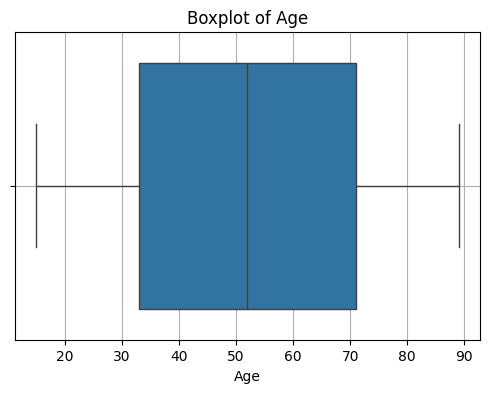

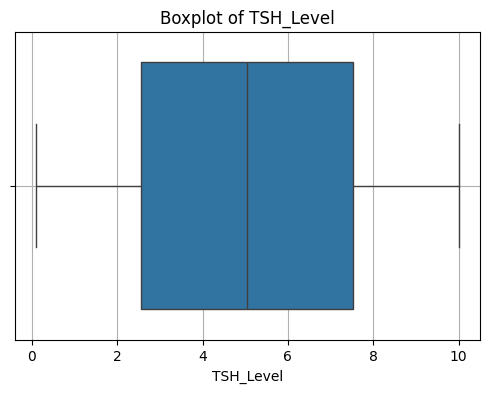

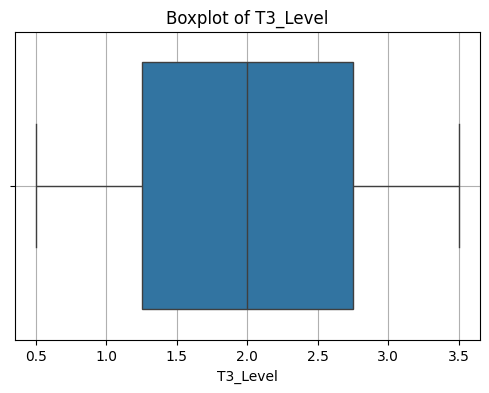

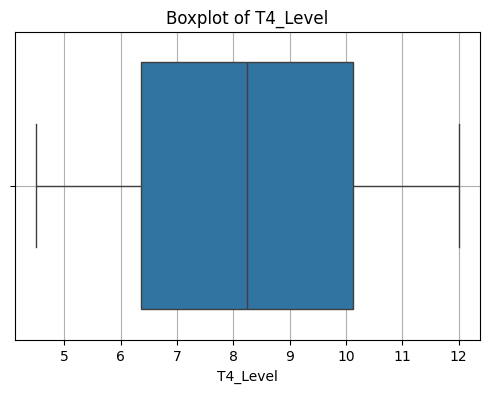

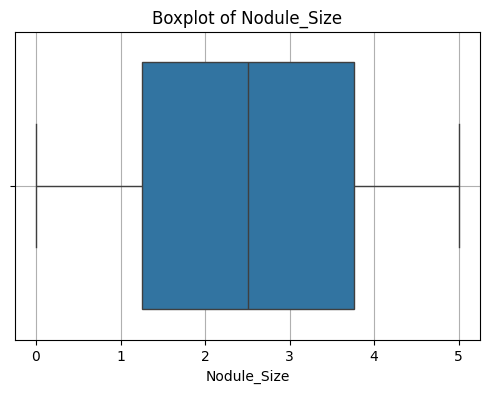

In [ ]:
#outlier detection:

# List of continuous features
numeric_cols = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

# Plot boxplots for each
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


 The box plots for the numerical variables (Age, TSH_Level, T3_Level, T4_Level, Nodule_Size) do not visually reveal any statistical outliers.  However, this does not necessarily imply that all observed values fall within medically acceptable or clinically normal ranges.





In [ ]:

# Definining thresholds based on clinical reference ranges

#TSH in healthy adults is typically between 0.4 and 4.0 mIU/L
# T3 in healthy adults is typically between  80 – 200 ng/dL
# T4 in healthy adults is typically between  5.0 – 12.0 µg/dL
# Nodule Size is Abnormal if > 10 mm (1 cm), data is in cm

df['TSH_abnormal'] = df['TSH_Level'].apply(lambda x: x < 0.4 or x > 4.0)
df['T3_abnormal'] = df['T3_Level'].apply(lambda x: x < 1.2 or x > 2.8)
df['T4_abnormal'] = df['T4_Level'].apply(lambda x: x < 5.0 or x > 12.0)
df['Nodule_abnormal'] = df['Nodule_Size'].apply(lambda x: x > 1)

In [ ]:
#to understand if there are any other values other than yes/no
yes_no_columns = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes']

for col in yes_no_columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False, normalize=True))


--- Family_History ---
Family_History
No     0.699917
Yes    0.300083
Name: proportion, dtype: float64

--- Radiation_Exposure ---
Radiation_Exposure
No     0.850205
Yes    0.149795
Name: proportion, dtype: float64

--- Iodine_Deficiency ---
Iodine_Deficiency
No     0.750728
Yes    0.249272
Name: proportion, dtype: float64

--- Smoking ---
Smoking
No     0.800504
Yes    0.199496
Name: proportion, dtype: float64

--- Obesity ---
Obesity
No     0.69963
Yes    0.30037
Name: proportion, dtype: float64

--- Diabetes ---
Diabetes
No     0.799742
Yes    0.200258
Name: proportion, dtype: float64


From the above, we can see that the data is clean  and has only the unique values as yes/ no and no other redundant data.

### **Exploratory Data analysis**

### Demographic Trends

-Age

-Gender

-Ethnicity trends

 Age and Gender

According to the American Cancer Society (n.d.), thyroid cancer incidence rises significantly after the age of 40, especially among women, who are three times more likely to be diagnosed than men. This trend is supported by SEER program data (NCI, 2022), which shows peak incidence between ages 40 and 60.

However, in our dataset, we observe patients as young as 15 years old. Although thyroid cancer is rare in this age group, it is not impossible. Therefore, we include this age group in our analysis to explore potential cancer risk among adolescents as well. Further to answer our question of if women are more malignant than men, lets visualise and know better.

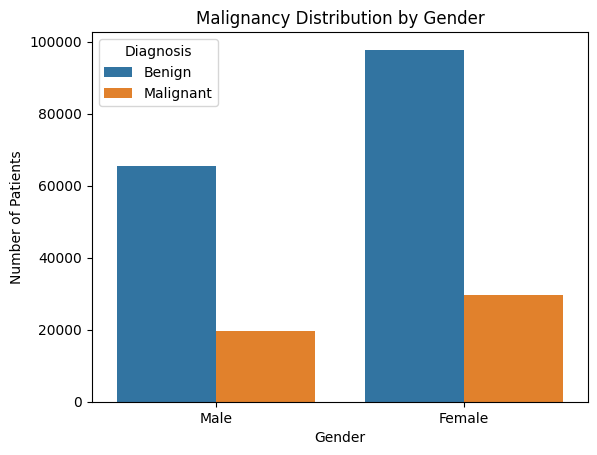

In [ ]:
sns.countplot(data=df, x='Gender', hue='Diagnosis')
plt.title('Malignancy Distribution by Gender')
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.show()

From the above barchart, it is seen that female have a higher risk of malignancy over men  although men are also prone to risk of thyroid cancer.

In [ ]:
# Calculate % malignant per age group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100], right=False)
pd.crosstab(df['Age_Group'], df['Diagnosis'], normalize='index') * 100

Diagnosis,Benign,Malignant
Age_Group,,
"[0, 20)",76.814035,23.185965
"[20, 30)",76.509311,23.490689
"[30, 40)",76.980285,23.019715
"[40, 50)",76.770918,23.229082
"[50, 60)",76.640696,23.359304
"[60, 70)",76.770629,23.229371
"[70, 80)",76.519491,23.480509
"[80, 100)",76.873884,23.126116


On the other hand, age group does not seem to influence the malignant cases highly. this is observed from the above table where the benign and malignant cases are calculated and we can see that all the age groups seem to have around 76% of benign cases and 23% of malignant cases. This shows that there are other factors that is seemed to impact the cause of thyroid cancer from this data set.

Although age is typically a known factor in thyroid cancer risk, the dataset shows a fairly uniform distribution of malignancy across all age groups, with malignancy rates consistently hovering around 23%.

This suggests that, in this particular dataset, age does not significantly influence the likelihood of malignancy. This could be due to the nature of the data collection process or a modeling approach that underrepresents age-related risk factors.


Ethinicity

Let's observe how ethinicity patterns tend to impact malignancy as per the data set.

In [ ]:
df['Ethnicity'].value_counts()

,count
Ethnicity,
Caucasian,63669
Asian,53261
African,42414
Hispanic,32012
Middle Eastern,21335


In [ ]:
pd.crosstab(df['Ethnicity'], df['Diagnosis'], normalize='index') * 100

Diagnosis,Benign,Malignant
Ethnicity,,
African,74.527279,25.472721
Asian,66.542123,33.457877
Caucasian,82.148298,17.851702
Hispanic,82.259778,17.740222
Middle Eastern,82.067026,17.932974


From the above, it is seen how people of African Ethnicity followed by Asian ethinicity tend to have a higher influence over malignant cases in comparison to the Caucasian, hispanic and Middle eastern ethinic individuals. The data could also be biased as the highest number of individuals are caucasians. So the African population data collected could be biased.

### Lifestyle and Historical Risk Factors

-Family History

-Radiation_Exposure

-Iodine_Deficiency

-Smoking

-Obesity

-Diabetes

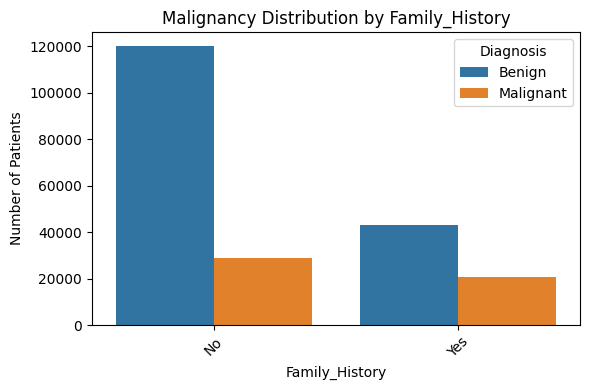

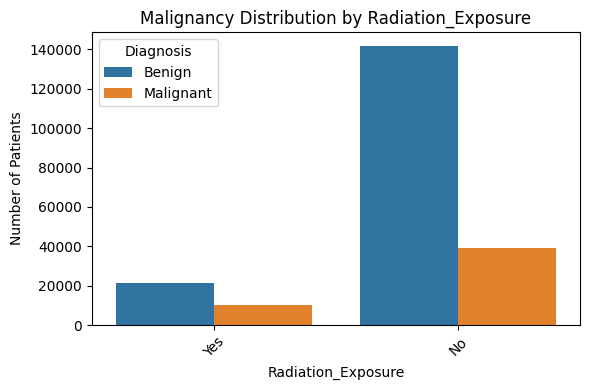

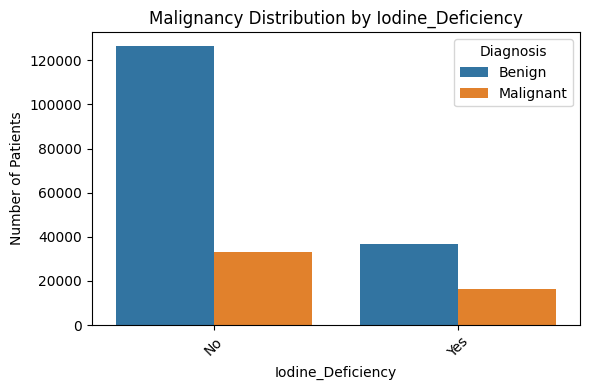

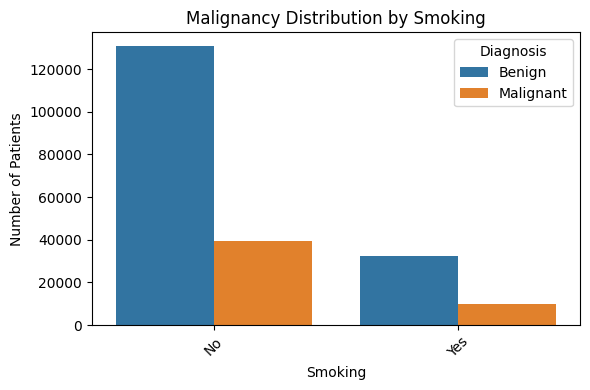

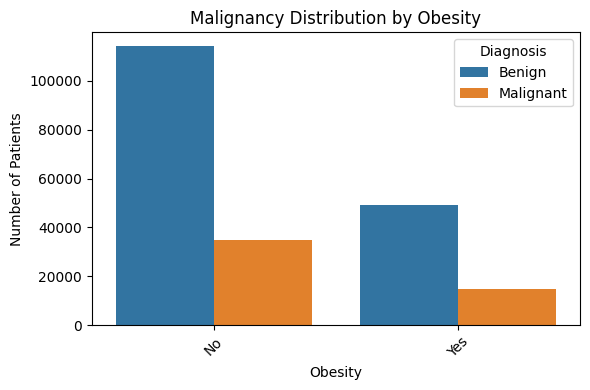

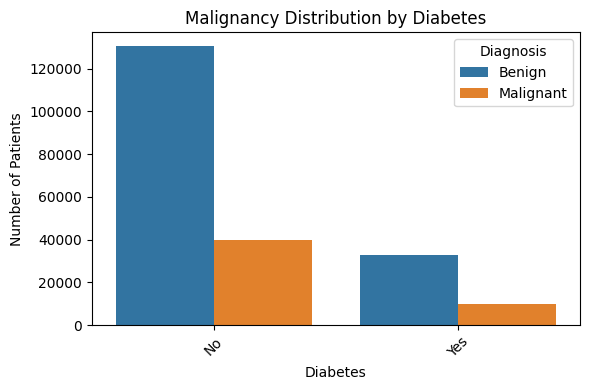

In [ ]:
risk_factors = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes']

for factor in risk_factors:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=factor, hue='Diagnosis')
    plt.title(f'Malignancy Distribution by {factor}')
    plt.xlabel(factor)
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Interestingly, in this dataset, patients who reported **no history of smoking, obesity, iodine deficiency, diabetes, or family history** of thyroid issues actually show **more malignant cases** compared to those who answered "Yes".

This pattern may reflect:
- A class imbalance in the dataset (as seen from the count above there is more people who answered 'No' than 'Yes')
- Or also these factors are underrepresented or underweighted in this particular sample.

On the other hand, **radiation exposure** shows a clear and expected trend: patients exposed to radiation have a **higher likelihood of malignancy**, aligning with clinical research and WHO guidelines.

Thus, while most individual lifestyle and hereditary factors do not show a clear relationship to cancer in this dataset, **radiation exposure stands out as a strong influencer of malignancy.**

### Hormonal and Physical Biomarkers

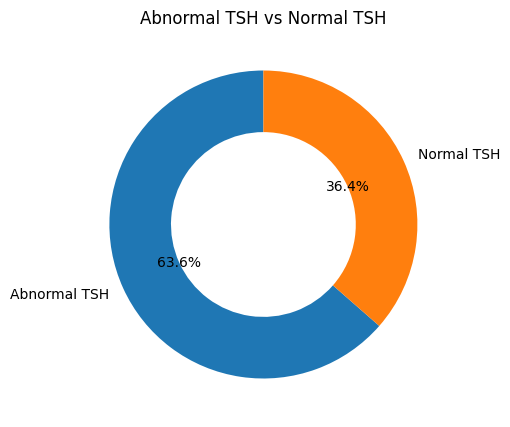

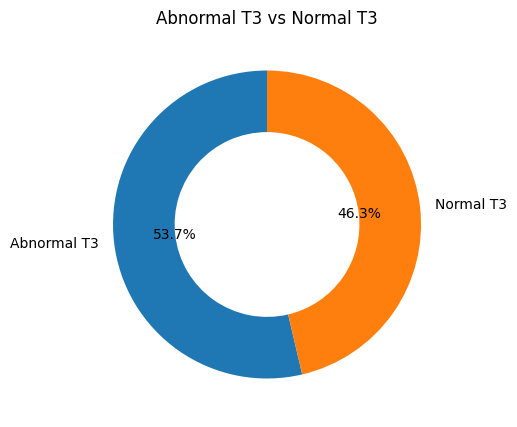

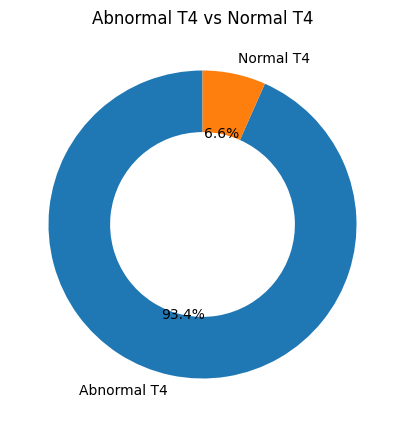

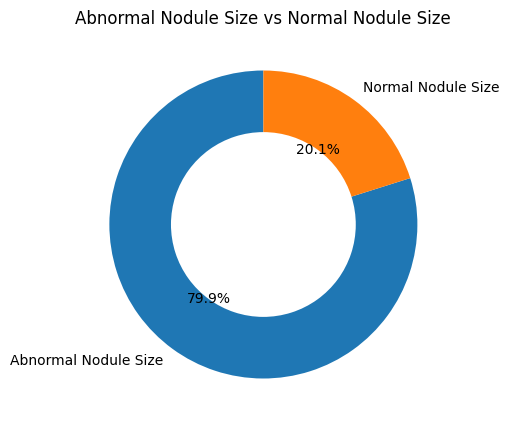

In [ ]:
#
charts = {
    'TSH_abnormal': ['Abnormal TSH' , 'Normal TSH'],
    'T3_abnormal': ['Abnormal T3', 'Normal T3'],
    'T4_abnormal': ['Abnormal T4', 'Normal T4'],
    'Nodule_abnormal': ['Abnormal Nodule Size', 'Normal Nodule Size']
}

# Generate pie charts
for col, labels in charts.items():
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot.pie(
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width': 0.4}
    )
    plt.title(f'{labels[0]} vs {labels[1]}')
    plt.ylabel('')
    plt.show()

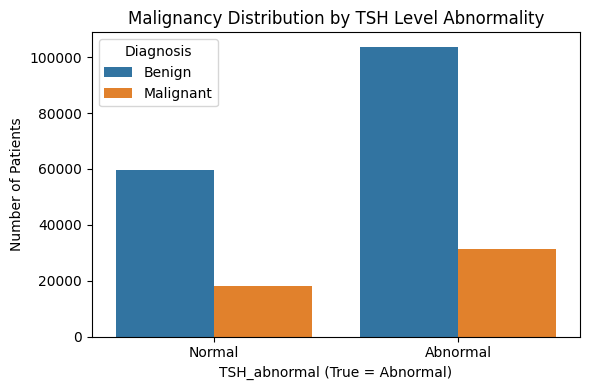

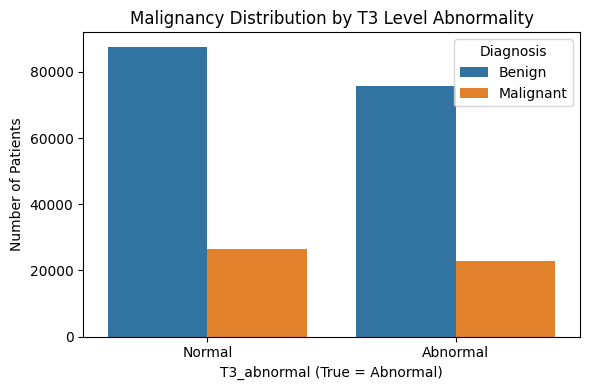

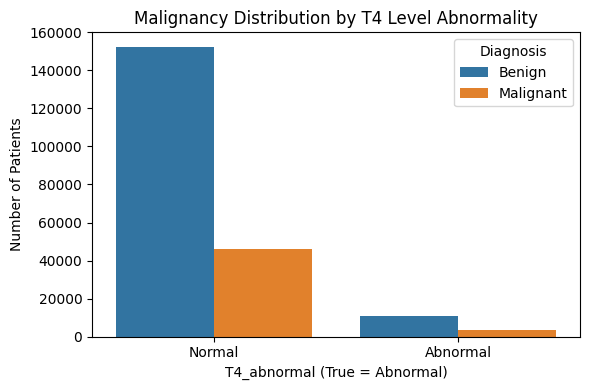

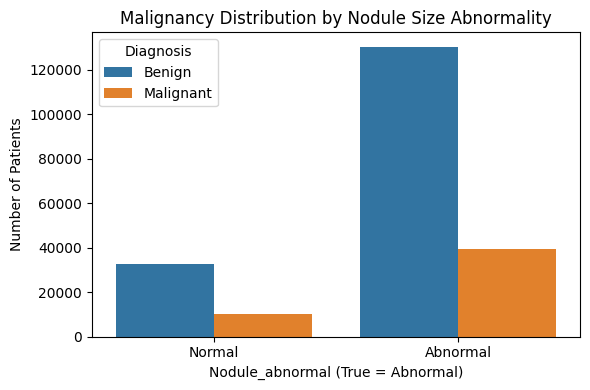

In [ ]:
#detect the malignancy across these factors
markers = ['TSH_abnormal','T3_abnormal', 'T4_abnormal', 'Nodule_abnormal']
titles = {
    'TSH_abnormal': 'Malignancy Distribution by TSH Level Abnormality',
    'T3_abnormal': 'Malignancy Distribution by T3 Level Abnormality',
    'T4_abnormal': 'Malignancy Distribution by T4 Level Abnormality',
    'Nodule_abnormal': 'Malignancy Distribution by Nodule Size Abnormality'
}

# Plot bar charts for malignancy across each marker
for marker in markers:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=marker, hue='Diagnosis')
    plt.title(titles[marker])
    plt.xlabel(f'{marker} (True = Abnormal)')
    plt.ylabel('Number of Patients')
    plt.xticks([0, 1], ['Normal', 'Abnormal'])
    plt.tight_layout()
    plt.show()

Among the markers analyzed, nodule size showed the clearest association with malignancy. Patients with **abnormal nodule sizes** had a noticeably higher number of malignant cases compared to those with normal sizes.

TSH, T3 and T4 levels, on the other hand, did not demonstrate a strong predictive relationship with malignancy in this dataset. This aligns with clinical understanding that while hormone levels are useful in diagnosing thyroid dysfunction, they are not always reliable indicators of cancer.

### Diagnosis

<Axes: title={'center': 'Diagnosis Distribution'}, ylabel='count'>

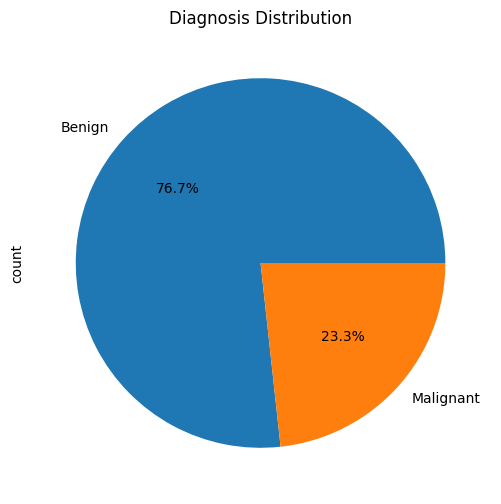

In [ ]:
df['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6, 6),title='Diagnosis Distribution')

From the above figure, we observe that 23.3% of the population from the dataset are diagnosed with malignant thyroid cancer and 76.7% are diagnosed with Benign thyroid cancer cases.

<Axes: title={'center': 'Thyroid Cancer Risk Distribution'}, ylabel='count'>

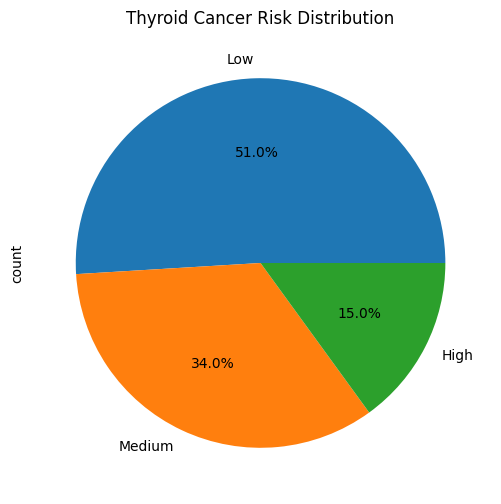

In [ ]:
#Assesing risk factor labelling
df['Thyroid_Cancer_Risk'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6, 6),title='Thyroid Cancer Risk Distribution')

The risk scoring system appears to exhibit a conservative bias, as it labels only 15% of patients as high risk despite a 23.3% malignant diagnosis rate. This suggests a preference for minimizing false positives, potentially at the expense of sensitivity. As a result, some malignant cases may be classified under medium or low risk, highlighting the need for careful validation of the model’s predictive thresholds.

Further analysis is required to assess how well the risk categories align with the final diagnosis — particularly whether **high-risk scores accurately predict malignancy** and if **any malignant cases were labeled low risk**, which could suggest a misclassification.


In [ ]:
low_risk_malignant = df[(df['Diagnosis'] == 'Malignant') & (df['Thyroid_Cancer_Risk'] == 'Low')].shape[0]
medium_risk_malignant = df[(df['Diagnosis'] == 'Malignant') & (df['Thyroid_Cancer_Risk'] == 'Medium')].shape[0]

total_missed_high_risk = low_risk_malignant + medium_risk_malignant
print("Malignant cases not labeled as High Risk:", total_missed_high_risk)

Malignant cases not labeled as High Risk: 27156


To understand better, lets visualise what proportion of the low and medium risk category cases are actually diagnosed malignant.

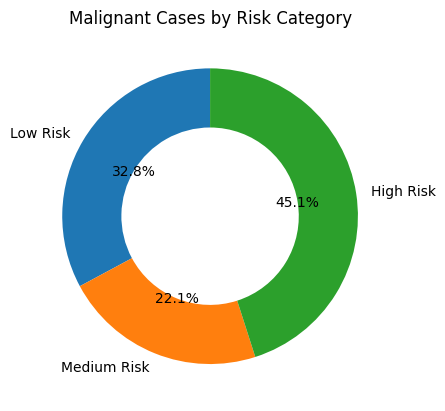

In [ ]:
low_malignant = 16235
medium_malignant = 10921
high_malignant = 49423 - (low_malignant + medium_malignant)

# Plot
plt.pie(
    [low_malignant, medium_malignant, high_malignant],
    labels=['Low Risk', 'Medium Risk', 'High Risk'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.title('Malignant Cases by Risk Category')
plt.show()

As seen from above, only 45.1% of malignant tumors were predicted as high risk of thyroid cancer. Whereas, 32.8% of the malignant cases were actually predicted to be having low risk and 22.1% was predicted to have a medium risk only respectively inspite of which, malignancy occured in thoses cases. So understand how other factors play a role, lets analyse every attribute for its impact in malignancy and the risk of malignancy as well.

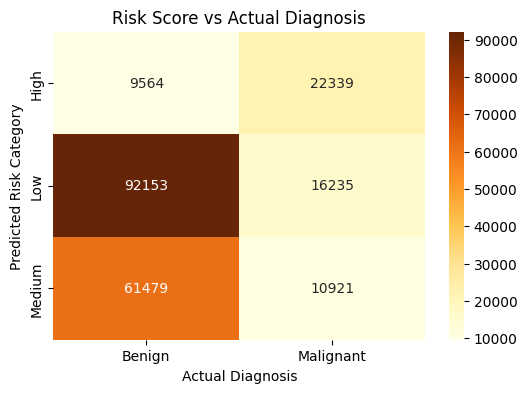

In [ ]:
#plotting a confusion tale due to the difference in percentage of risk category vs malignancy
# Step 1: Confusion table
conf_matrix = pd.crosstab(df['Thyroid_Cancer_Risk'], df['Diagnosis'])

# Step 2: Plot it as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Risk Score vs Actual Diagnosis')
plt.ylabel('Predicted Risk Category')
plt.xlabel('Actual Diagnosis')
plt.show()

In [ ]:
# Total number of malignant patients
total_malignant = df[df['Diagnosis'] == 'Malignant'].shape[0]

# Malignant patients not labeled High risk
false_negatives = df[(df['Diagnosis'] == 'Malignant') & (df['Thyroid_Cancer_Risk'] != 'High')].shape[0]

# Missed detection rate
missed_rate = (false_negatives / total_malignant) * 100
print(f"Missed Malignant Cases: {false_negatives} out of {total_malignant}")
print(f"Missed Detection Rate: {missed_rate:.2f}%")

Missed Malignant Cases: 27156 out of 49495
Missed Detection Rate: 54.87%



We compared the Thyroid_Cancer_Risk (Low, Medium, High) with the actual Diagnosis (Benign, Malignant) to evaluate the risk scoring system.

The confusion matrix revealed that a significant number of malignant cases were labeled as Low or Medium risk.

Malignant cases that were **not** labeled as "High" risk are considered **false negatives** in this context. These represent patients who may not receive timely follow-up or biopsy.

Missed detection rate = (false negatives / total malignant cases) × 100


### Multivariate analysis of risk combinations

Since as single factors, there were not any clear indicators of causing thyroid cancer, based on the above observations lets see if combinations are contributing to cause malignant cthyroid cancers. From aboves, factors such as gender, radiation exposure, ethnicity, nodule size being abnormal were seen to have an impact on the malignancy of thyroid cancer from the data set. so lets see which combinations are prone to have highest risk of causing thyroid cancer.

In [ ]:
risk_combo = df.groupby(
    ['Gender', 'Radiation_Exposure', 'Ethnicity', 'Nodule_abnormal']
)['Diagnosis'].value_counts(normalize=True).unstack().fillna(0) * 100

# Sort by % of Malignant cases to see the strongest combinations
sorted_combo = risk_combo.sort_values(by='Malignant', ascending=False)

sorted_combo

Diagnosis                                                    Benign  Malignant
Gender Radiation_Exposure Ethnicity      Nodule_abnormal                      
Male   Yes                African        False            29.025845  70.974155
Female Yes                African        True             29.371090  70.628910
Male   Yes                African        True             31.104651  68.895349
Female Yes                African        False            32.294264  67.705736
       No                 Asian          False            66.203446  33.796554
       Yes                Asian          True             66.280905  33.719095
       No                 Asian          True             66.316947  33.683053
       Yes                Asian          False            66.523605  33.476395
Male   No                 Asian          False            66.612510  33.387490
                                         True             66.908814  33.091186
       Yes                Asian          True             67.089611  32.910389
                                         False            67.823344  32.176656
                          Middle Eastern False            79.215686  20.784314
Female Yes                Hispanic       False            80.602007  19.397993
                          Middle Eastern True             80.730479  19.269521
Male   Yes                Hispanic       True             80.792891  19.207109
                                         False            81.220657  18.779343
       No                 Middle Eastern False            81.370592  18.629408
       Yes                Caucasian      True             81.708115  18.291885
       No                 Hispanic       False            81.723356  18.276644
Female No                 Hispanic       False            81.801242  18.198758
       Yes                Hispanic       True             81.943250  18.056750
Male   No                 Caucasian      True             81.983840  18.016160
       Yes                Caucasian      False            81.994819  18.005181
Female No                 Middle Eastern True             82.104775  17.895225
                          Caucasian      True             82.116141  17.883859
                                         False            82.182213  17.817787
Male   No                 Middle Eastern True             82.203684  17.796316
                          African        True             82.253965  17.746035
Female Yes                Caucasian      False            82.352941  17.647059
       No                 African        True             82.410688  17.589312
                                         False            82.418813  17.581187
                          Hispanic       True             82.469815  17.530185
Male   No                 Caucasian      False            82.525832  17.474168
                          Hispanic       True             82.746317  17.253683
       Yes                Middle Eastern True             82.755299  17.244701
Female Yes                Caucasian      True             82.826279  17.173721
       No                 Middle Eastern False            82.837529  17.162471
Male   No                 African        False            82.893384  17.106616
Female Yes                Middle Eastern False            83.072917  16.927083

Among all combinations, patients of African ethnicity with a history of radiation exposure — regardless of nodule size — show the highest rates of malignancy (~70%). This may suggest a potential vulnerability or data representation bias in this subgroup.

In contrast, Middle Eastern and Hispanic patients showed considerably lower malignancy rates, particularly those without radiation exposure. Asian patients consistently showed intermediate malignancy risk (~33%), with only minor variation based on nodule size or radiation.

This suggests that combining ethnicity, radiation history, and nodule characteristics can help identify high-risk profiles, with African patients exposed to radiation representing a group that may benefit from more intensive diagnostic screening.


In [ ]:
df.groupby(['Ethnicity', 'Radiation_Exposure'])['Diagnosis'].value_counts(normalize=True).unstack().fillna(0) * 100

Diagnosis                             Benign  Malignant
Ethnicity      Radiation_Exposure                      
African        No                  82.401133  17.598867
               Yes                 30.268498  69.731502
Asian          No                  66.516057  33.483943
               Yes                 66.692015  33.307985
Caucasian      No                  82.114316  17.885684
               Yes                 82.342399  17.657601
Hispanic       No                  82.418471  17.581529
               Yes                 81.362975  18.637025
Middle Eastern No                  82.163807  17.836193
               Yes                 81.531394  18.468606

Among all ethnic groups analyzed, African patients with a history of radiation exposure exhibited the highest malignancy rate at approximately 69.7%, a sharp contrast to their 17.6% rate without exposure. In comparison, other ethnicities such as Asian, Caucasian, Hispanic, and Middle Eastern showed relatively stable malignancy rates, regardless of radiation history, typically ranging between 17% and 33%. This indicates a potential ethnicity-specific interaction with radiation exposure, suggesting that African patients may be at significantly higher risk when this factor is present. These findings highlight the importance of incorporating both demographic and clinical history in personalized cancer risk assessments.

### **Building a predictive model**

To address the limitations observed in the existing Thyroid_Cancer_Risk scoring system—particularly the high number of malignant cases not labeled as "High risk"—we'll build a simple predictive model.

This model uses clinical and demographic features such as gender, ethnicity, radiation exposure, and nodule size to predict whether a patient is likely to be diagnosed with thyroid cancer.

We'll use a logistic regression classifier to evaluate how well these features perform in identifying malignant cases.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


features = ['Gender', 'Ethnicity', 'Radiation_Exposure', 'Nodule_abnormal']
model_df = df[features + ['Diagnosis']].copy()

#Encode target (Malignant = 1, Benign = 0)
model_df['Diagnosis'] = model_df['Diagnosis'].map({'Benign': 0, 'Malignant': 1})

#One-hot encode categorical features
model_df = pd.get_dummies(model_df, drop_first=True)

#Train/test split
X = model_df.drop('Diagnosis', axis=1)
y = model_df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model with class balancing since the dataset has malignant cases as minority
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

#Prediction and evaluation of the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.642821881097346
Confusion Matrix:
 [[22234 10381]
 [ 4813  5111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.75     32615
           1       0.33      0.52      0.40      9924

    accuracy                           0.64     42539
   macro avg       0.58      0.60      0.57     42539
weighted avg       0.71      0.64      0.67     42539



After applying class balancing to our logistic regression model, we observed a significant improvement in its ability to identify malignant cases:

- **Accuracy**: 64.3%
- **Recall (Malignant class)**: 52%
- **Precision (Malignant class)**: 33%
- **F1-score (Malignant class)**: 0.40
- **False Negatives reduced from 9,924 to 4,813**

These results show that the model now identifies over half of the malignant patients, a major improvement from the original model that failed to detect any. Although the precision for malignant cases is modest, this is often acceptable in medical contexts where missing a true positive (malignancy) can be more critical than over-identifying.

This model highlights the importance of using data-driven features and class balancing in improving sensitivity over conservative rule-based risk scores.

### Conclusion

This project demonstrates how exploratory data analysis and machine learning can help bridge the gap between risk scoring systems and actual thyroid cancer diagnoses. Initial exploratory data analysis revealed key associations—most notably, the strong influence of radiation exposure and abnormal nodule size on malignancy. African patients with radiation exposure showed the highest malignancy rate (~70%), highlighting the importance of ethnicity-specific risk profiling from the current data set.

The existing Thyroid_Cancer_Risk scoring system, while conservative, missed a substantial number of malignant cases. A confusion matrix analysis revealed that **over 27,000 malignant patients were not labeled as "High risk"**, raising concerns about potential underdiagnosis.

To address this, a logistic regression model was built using gender, ethnicity, radiation exposure, and nodule abnormality as features. After applying class balancing to mitigate dataset imbalance, the model successfully identified over **52% of malignant cases**, reducing false negatives by more than half. While precision remained modest, the model demonstrated meaningful potential to complement or enhance current risk scoring methods.

This model is an exploratory proof-of-concept and requires external validation before any clinical use.

References:


* Tabiti, H., Gbadamassi, A. A., Bendahhou, K., & Oussafrar, Z. (2025). Occurrence of metastases in differentiated thyroid carcinoma patients: A retrospective study in Morocco covering 10 years of follow-up. Cureus. Retrieved from https://www.cureus.com/articles/333124-occurrence-of-metastases-in-differentiated-thyroid-carcinoma-patients-a-retrospective-study-in-morrocco-covering-10-years-of-follow-up.pdf
*  Zhang, X. Y., Zhang, D., Zhou, W., & Wang, Z. Y. (2025). Predicting lymph node metastasis in papillary thyroid carcinoma: Radiomics using two types of ultrasound elastography. Cancer Imaging. Retrieved from https://pmc.ncbi.nlm.nih.gov/articles/PMC11827213/
*   Shan, R., Li, X., Chen, J., Chen, Z., Cheng, Y. J., & Han, B. (2025). Interpretable machine learning to predict the malignancy risk of follicular thyroid neoplasms in extremely unbalanced data: Retrospective cohort study. JMIR Cancer. Retrieved from https://cancer.jmir.org/2025/1/e66269
*   Chowdhury, R., Turkdogan, S., Silver, J. A., & Hier, J. (2024). Approach to hyperthyroidism and its effects on thyroid cancer risk. MDPI. Retrieved from https://www.mdpi.com/2504-463X/5/2/20

*  Park, S. J., Lee, D. K., & Lee, H. J. (2025). Excessive iodine intake during lactation is not related to the incidence of thyroid disease: A 3-year follow-up study. Nutrients. Retrieved from https://www.mdpi.com/2072-6643/17/3/476
*   Hussein, M., Herrera, M., & Pinion, D. (2025). The impact of radioactive iodine on outcomes among pediatric and adolescent thyroid cancer patients: A SEER database analysis. Cancers. Retrieved from https://www.mdpi.com/2072-6694/17/1/107
*   Luo, L., Xia, J., Zhang, R., & Yao, X. (2025). Efficacy and prognosis in patients with papillary thyroid cancer with postoperative preablative stimulated thyroglobulin measurement. Acta Endocrinologica. Retrieved from https://pmc.ncbi.nlm.nih.gov/articles/PMC11750234/
*   Toraih, E., Hussein, M., & Elshazli, R. (2025). Therapeutic outcomes and safety of radiofrequency ablation for primary papillary thyroid carcinoma: A meta-analysis. Radiotherapy and Oncology. Retrieved from https://www.sciencedirect.com/science/article/pii/S0167814025000015
*   Chang, S. L. (2025). Predictive factors for malignancy in cytologically diagnosed oncocytic cell neoplasm of the thyroid: A single-center analysis. Authorea. Retrieved from https://www.authorea.com/doi/full/10.22541/au.173900674.46027215
*   American Cancer Society. (n.d.). *Thyroid cancer risk factors*. Retrieved April 24, 2025, from https://www.cancer.org/cancer/thyroid-cancer/causes-risks-prevention/risk-factors.html


























